In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# import all necessary libraries

In [3]:
vacc_data=pd.read_csv("h1n1_vaccine_prediction.csv")
vacc_data.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,sick_from_seas_vacc,race,sex,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,White,Female,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.0,White,Male,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,2.0,White,Male,Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,White,Female,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,4.0,White,Female,Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [5]:
vacc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [6]:
vacc_data.isnull().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
race                             0
sex                              0
marital_status                1408
housing_status                2042
employment                    1463
census_msa                       0
no_of_adults                   249
no_of_children      

In [7]:
# conduct EDA
# since null values in "has_health insur" is greater than 50% ,it is removed
vacc_data=vacc_data.drop('has_health_insur',axis=1)
vacc_data

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,sick_from_seas_vacc,race,sex,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,White,Female,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.0,White,Male,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,2.0,White,Male,Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,White,Female,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,4.0,White,Female,Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,White,Female,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,White,Male,Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,2.0,White,Female,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,2.0,Hispanic,Female,Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [8]:
#All the null value row are removed
vacc_data.isnull().sum()

h1n1_worry                     92
h1n1_awareness                116
antiviral_medication           71
contact_avoidance             208
bought_face_mask               19
wash_hands_frequently          42
avoid_large_gatherings         87
reduced_outside_home_cont      82
avoid_touch_face              128
dr_recc_h1n1_vacc            2160
dr_recc_seasonal_vacc        2160
chronic_medic_condition       971
cont_child_undr_6_mnths       820
is_health_worker              804
is_h1n1_vacc_effective        391
is_h1n1_risky                 388
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
race                            0
sex                             0
marital_status               1408
housing_status               2042
employment                   1463
census_msa                      0
no_of_adults                  249
no_of_children                249
h1n1_vaccine                    0
dtype: int64

In [9]:
vacc_data=vacc_data.dropna(axis=0)

In [10]:
vacc_data

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,sick_from_seas_vacc,race,sex,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,White,Female,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.0,White,Male,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,White,Female,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,4.0,White,Female,Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,4.0,White,Male,Married,Own,Employed,"MSA, Principle City",2.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,5.0,White,Female,Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,4.0,White,Female,Not Married,Rent,Not in Labor Force,"MSA, Principle City",3.0,0.0,0
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,White,Female,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,White,Male,Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0


In [11]:
vacc_data.describe()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,21793.000000,21793.000000,21793.000000,21793.000000,21793.000000,21793.000000,21793.000000,21793.000000,21793.000000,21793.000000,...,21793.000000,21793.000000,21793.000000,21793.000000,21793.000000,21793.000000,21793.000000,21793.000000,21793.000000,21793.000000
mean,1.613179,1.288854,0.048685,0.734227,0.067499,0.832148,0.356904,0.334924,0.684624,0.223099,...,0.115129,3.896251,2.343138,2.347176,4.051209,2.738861,2.107649,0.899555,0.530859,0.226770
std,0.896055,0.604630,0.215214,0.441754,0.250890,0.373743,0.479097,0.471975,0.464676,0.416334,...,0.319185,0.992224,1.285402,1.356635,1.068523,1.387994,1.327091,0.753696,0.924795,0.418752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000,1.000000,1.000000,0.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [13]:
vacc_data

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,sick_from_seas_vacc,race,sex,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,White,Female,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.0,White,Male,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,White,Female,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,4.0,White,Female,Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,4.0,White,Male,Married,Own,Employed,"MSA, Principle City",2.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,5.0,White,Female,Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,4.0,White,Female,Not Married,Rent,Not in Labor Force,"MSA, Principle City",3.0,0.0,0
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,White,Female,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,White,Male,Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0


In [15]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
vacc_data['race']=le.fit_transform(vacc_data.race)
vacc_data['sex']=le.fit_transform(vacc_data.sex)
vacc_data['marital_status']=le.fit_transform(vacc_data.marital_status)
vacc_data['housing_status']=le.fit_transform(vacc_data.housing_status)
vacc_data['employment']=le.fit_transform(vacc_data.employment)
vacc_data['census_msa']=le.fit_transform(vacc_data.census_msa)
vacc_data

<ipython-input-15-0e82d888f52e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacc_data['race']=le.fit_transform(vacc_data.race)
<ipython-input-15-0e82d888f52e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacc_data['sex']=le.fit_transform(vacc_data.sex)
<ipython-input-15-0e82d888f52e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,sick_from_seas_vacc,race,sex,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,3,0,1,0,1,2,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.0,3,1,1,1,0,0,0.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,3,0,1,1,1,1,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,4.0,3,0,0,0,0,0,1.0,0.0,0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,4.0,3,1,0,0,0,1,2.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,5.0,3,0,0,0,1,1,1.0,0.0,0
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,4.0,3,0,1,1,1,1,3.0,0.0,0
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,3,0,1,0,1,2,0.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,3,1,1,1,0,1,1.0,0.0,0


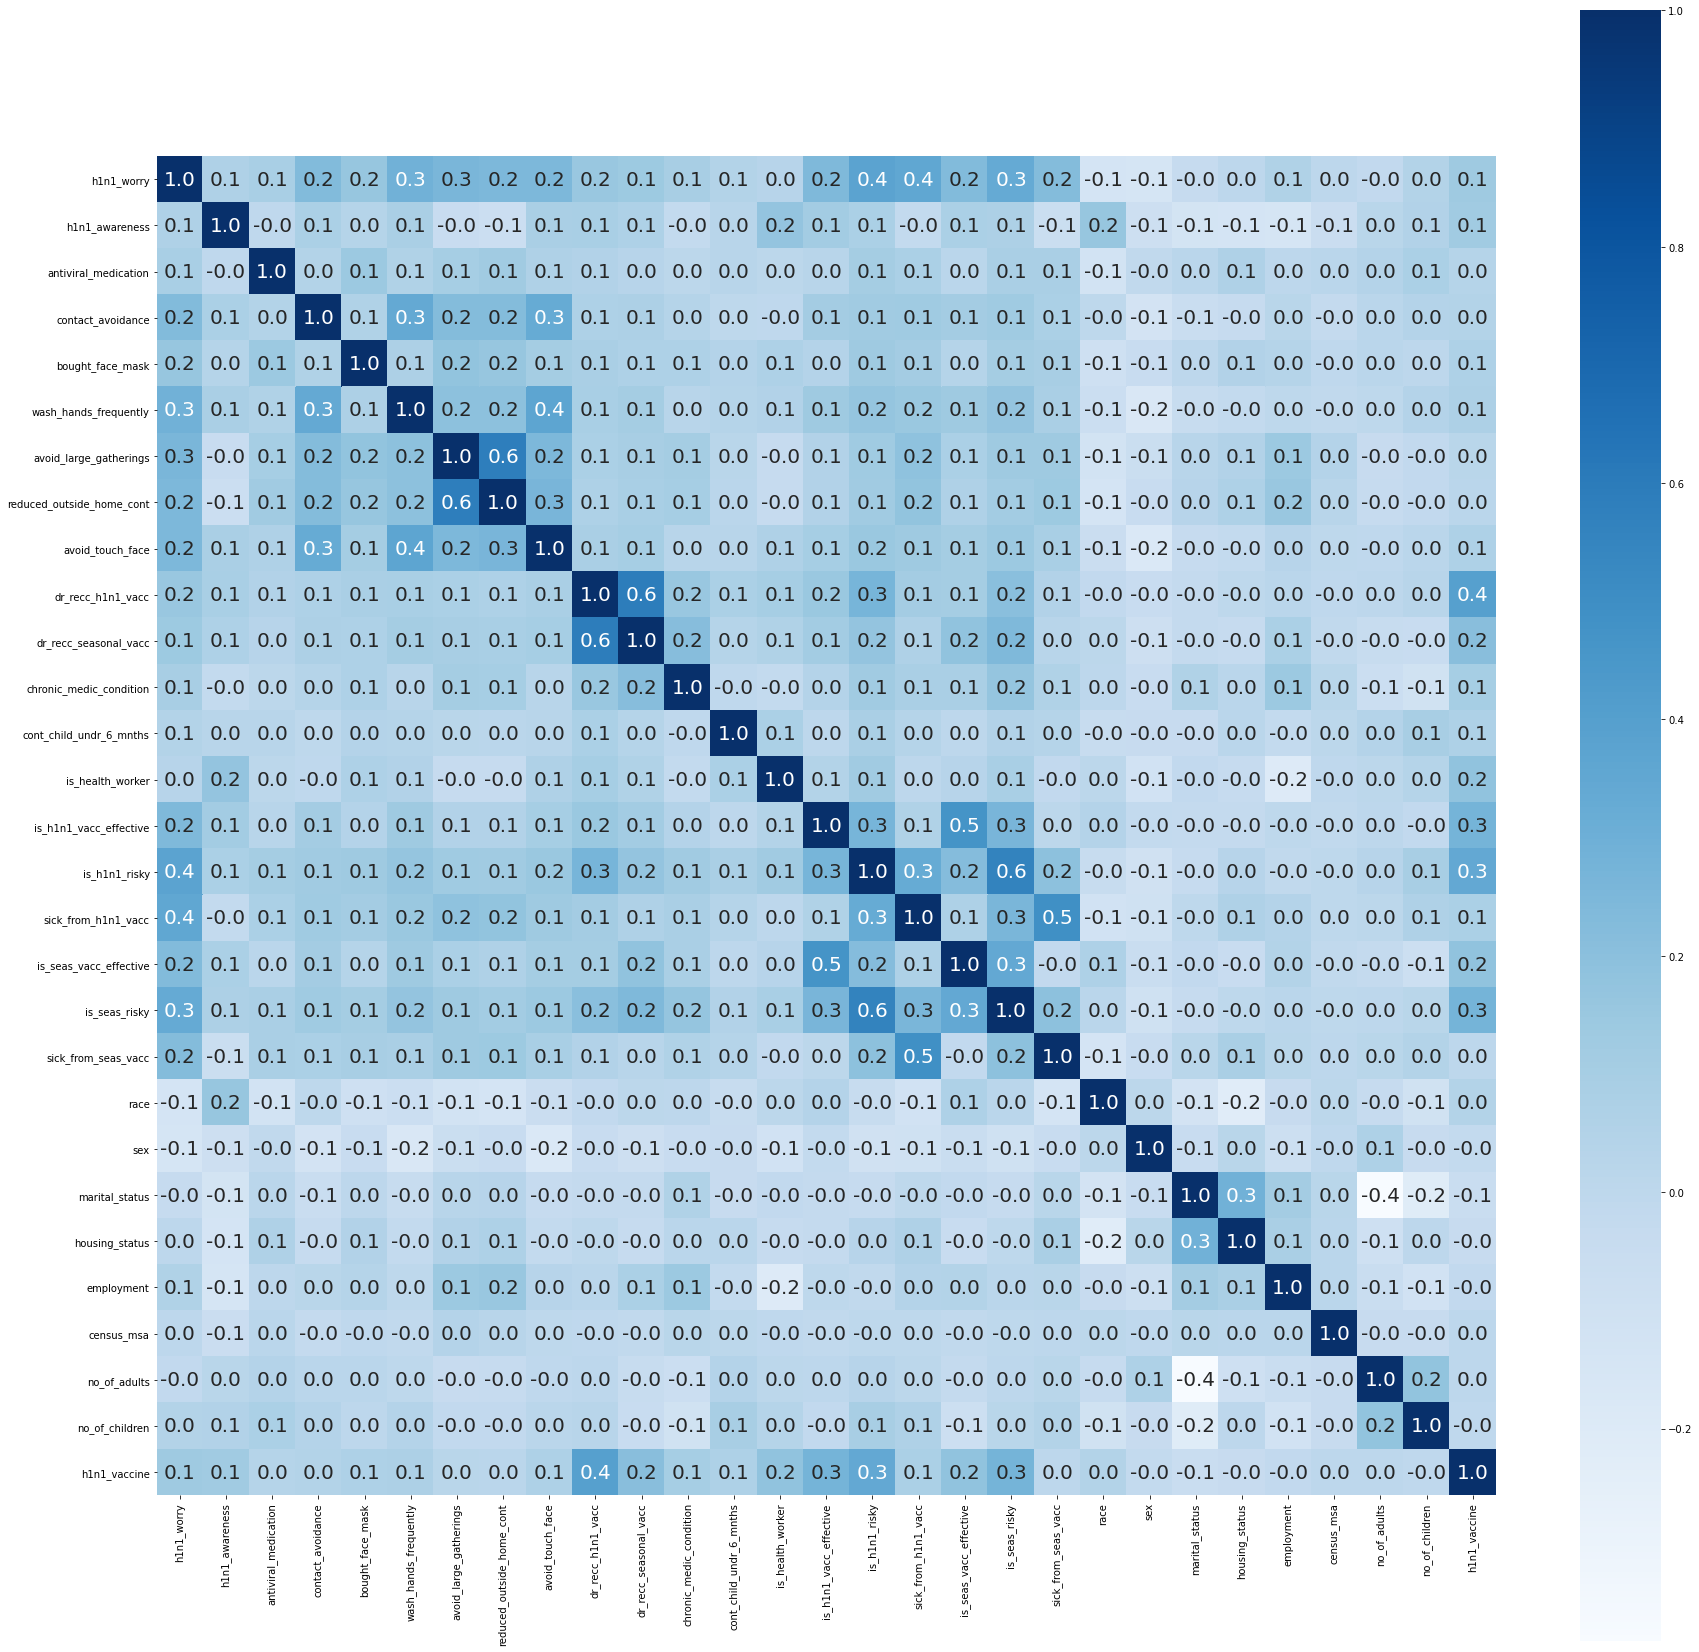

In [17]:
vacc_data_corr=vacc_data.corr()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(vacc_data_corr,annot=True,ax=ax,cmap="Blues",annot_kws={"size": 20},fmt=".1f",square=True);

In [18]:
vacc_data

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,sick_from_seas_vacc,race,sex,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,3,0,1,0,1,2,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.0,3,1,1,1,0,0,0.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,3,0,1,1,1,1,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,4.0,3,0,0,0,0,0,1.0,0.0,0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,4.0,3,1,0,0,0,1,2.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,5.0,3,0,0,0,1,1,1.0,0.0,0
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,4.0,3,0,1,1,1,1,3.0,0.0,0
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,3,0,1,0,1,2,0.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,3,1,1,1,0,1,1.0,0.0,0


In [34]:
y_dep=vacc_data.iloc[:,28] #loc can be given
x_ind=vacc_data.iloc[:,0:28]


In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.2,random_state=1)

In [36]:
import statsmodels.api as stm

In [37]:
model_stat=stm.Logit(y_train,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.431206
         Iterations 6


In [38]:
model_stat.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.194     
Dependent Variable:    h1n1_vaccine        AIC:                 15091.2977
Date:                  2021-03-19 13:30    BIC:                 15308.7506
No. Observations:      17434               Log-Likelihood:      -7517.6   
Df Model:              27                  LL-Null:             -9330.1   
Df Residuals:          17406               LLR p-value:         0.0000    
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        6.0000                                             
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
h1n1_worry                -0.1245   0.0281  -4.4360 0.0000 -0.1794 -0.0695
h1n1_awareness            -0.1199   0.0354  -3.3859 0.0007 -0.1894 -0.0505
antiviral_medication       0.0672   0.0957   0.7026 0.4823 -0.1203  0.2547
contact_avoidance         -0.1424   0.0515  -2.7630 0.0057 -0.2434 -0.0414
bought_face_mask           0.1394   0.0807   1.7274 0.0841 -0.0188  0.2975
wash_hands_frequently     -0.4244   0.0612  -6.9343 0.0000 -0.5444 -0.3044
avoid_large_gatherings    -0.1455   0.0550  -2.6444 0.0082 -0.2533 -0.0377
reduced_outside_home_cont -0.0763   0.0559  -1.3642 0.1725 -0.1860  0.0333
avoid_touch_face          -0.0827   0.0505  -1.6370 0.1016 -0.1816  0.0163
dr_recc_h1n1_vacc          2.1089   0.0620  33.9945 0.0000  1.9873  2.2305
dr_recc_seasonal_vacc     -0.5850   0.0608  -9.6238 0.0000 -0.7041 -0.4658
chronic_medic_condition    0.0998   0.0467   2.1382 0.0325  0.0083  0.1913
cont_child_undr_6_mnths    0.1444   0.0714   2.0215 0.0432  0.0044  0.2844
is_health_worker           0.7370   0.0609  12.0921 0.0000  0.6175  0.8564
is_h1n1_vacc_effective     0.2228   0.0242   9.2098 0.0000  0.1754  0.2702
is_h1n1_risky              0.3959   0.0202  19.5823 0.0000  0.3563  0.4355
sick_from_h1n1_vacc       -0.0743   0.0187  -3.9759 0.0001 -0.1109 -0.0377
is_seas_vacc_effective    -0.1707   0.0224  -7.6348 0.0000 -0.2146 -0.1269
is_seas_risky              0.1857   0.0192   9.6652 0.0000  0.1480  0.2233
sick_from_seas_vacc       -0.2027   0.0184 -10.9930 0.0000 -0.2388 -0.1666
race                      -0.3046   0.0214 -14.2453 0.0000 -0.3465 -0.2627
sex                       -0.2347   0.0429  -5.4692 0.0000 -0.3188 -0.1506
marital_status            -0.7335   0.0472 -15.5366 0.0000 -0.8260 -0.6410
housing_status            -0.3995   0.0539  -7.4173 0.0000 -0.5050 -0.2939
employment                -0.0919   0.0369  -2.4881 0.0128 -0.1643 -0.0195
census_msa                -0.1304   0.0249  -5.2469 0.0000 -0.1792 -0.0817
no_of_adults              -0.3832   0.0315 -12.1743 0.0000 -0.4449 -0.3215
no_of_children            -0.2595   0.0244 -10.6403 0.0000 -0.3073 -0.2117
==========================================================================

"""

In [70]:
#x_train.drop(['employment'],axis=1,inplace=True)
model_stat=stm.Logit(y_train,x_train).fit()
model_stat.summary2()

Optimization terminated successfully.
         Current function value: 0.431206
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.194     
Dependent Variable:    h1n1_vaccine        AIC:                 15091.2977
Date:                  2021-03-19 13:46    BIC:                 15308.7506
No. Observations:      17434               Log-Likelihood:      -7517.6   
Df Model:              27                  LL-Null:             -9330.1   
Df Residuals:          17406               LLR p-value:         0.0000    
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        6.0000                                             
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
h1n1_worry                -0.1245   0.0281  -4.4360 0.0000 -0.1794 -0.0695
h1n1_awareness            -0.1199   0.0354  -3.3859 0.0007 -0.1894 -0.0505
antiviral_medication       0.0672   0.0957   0.7026 0.4823 -0.1203  0.2547
contact_avoidance         -0.1424   0.0515  -2.7630 0.0057 -0.2434 -0.0414
bought_face_mask           0.1394   0.0807   1.7274 0.0841 -0.0188  0.2975
wash_hands_frequently     -0.4244   0.0612  -6.9343 0.0000 -0.5444 -0.3044
avoid_large_gatherings    -0.1455   0.0550  -2.6444 0.0082 -0.2533 -0.0377
reduced_outside_home_cont -0.0763   0.0559  -1.3642 0.1725 -0.1860  0.0333
avoid_touch_face          -0.0827   0.0505  -1.6370 0.1016 -0.1816  0.0163
dr_recc_h1n1_vacc          2.1089   0.0620  33.9945 0.0000  1.9873  2.2305
dr_recc_seasonal_vacc     -0.5850   0.0608  -9.6238 0.0000 -0.7041 -0.4658
chronic_medic_condition    0.0998   0.0467   2.1382 0.0325  0.0083  0.1913
cont_child_undr_6_mnths    0.1444   0.0714   2.0215 0.0432  0.0044  0.2844
is_health_worker           0.7370   0.0609  12.0921 0.0000  0.6175  0.8564
is_h1n1_vacc_effective     0.2228   0.0242   9.2098 0.0000  0.1754  0.2702
is_h1n1_risky              0.3959   0.0202  19.5823 0.0000  0.3563  0.4355
sick_from_h1n1_vacc       -0.0743   0.0187  -3.9759 0.0001 -0.1109 -0.0377
is_seas_vacc_effective    -0.1707   0.0224  -7.6348 0.0000 -0.2146 -0.1269
is_seas_risky              0.1857   0.0192   9.6652 0.0000  0.1480  0.2233
sick_from_seas_vacc       -0.2027   0.0184 -10.9930 0.0000 -0.2388 -0.1666
race                      -0.3046   0.0214 -14.2453 0.0000 -0.3465 -0.2627
sex                       -0.2347   0.0429  -5.4692 0.0000 -0.3188 -0.1506
marital_status            -0.7335   0.0472 -15.5366 0.0000 -0.8260 -0.6410
housing_status            -0.3995   0.0539  -7.4173 0.0000 -0.5050 -0.2939
employment                -0.0919   0.0369  -2.4881 0.0128 -0.1643 -0.0195
census_msa                -0.1304   0.0249  -5.2469 0.0000 -0.1792 -0.0817
no_of_adults              -0.3832   0.0315 -12.1743 0.0000 -0.4449 -0.3215
no_of_children            -0.2595   0.0244 -10.6403 0.0000 -0.3073 -0.2117
==========================================================================

"""

In [71]:
from sklearn.linear_model import LogisticRegression
model_train=LogisticRegression()
model_train.fit(x_train,y_train)

LogisticRegression()

In [72]:
y_pred=model_train.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)


array([[3164,  204],
       [ 563,  428]], dtype=int64)

In [74]:
accuracy_score(y_test,y_pred)

0.8240422115164029

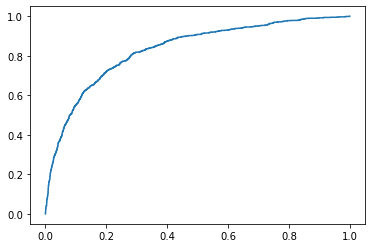

In [76]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc=roc_auc_score(y_test,model_train.predict(x_test))
fpr,tpr,thresholds=roc_curve(y_test,model_train.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,logit_roc_auc);

In [89]:
from sklearn.metrics import accuracy_score
z=LogisticRegression(class_weight="balanced")
z.fit(x_train,y_train)
THRESHOLD=0.8

In [90]:
pred=np.where(z.predict_proba(x_test)[:,1]>THRESHOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test,pred)],index=["accuracy"])

,0
accuracy,0.822436


In [91]:
confusion_matrix(y_test,pred)

array([[3190,  178],
       [ 596,  395]], dtype=int64)

In [92]:
accuracy_score(y_test,pred)

0.8224363386097728